In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from extract_data import extract_data

MA state code is 25.

Data on Ability to speak English is in row 29 for each year.

Total Population data is in row 0 for each year.

Education attainment data is in rows 30-33 for each year.

Employment by Occupation data is in rows 56-65 for each year.

In [24]:
start = 29
end = 29
ase = extract_data(start, end)

start = 0
end = 0
population = extract_data(start, end)

In [54]:
d = {'English Proficiency': 1 - (np.array(ase[25]) / np.array(population[25]))}
df = pd.DataFrame(data = d)
df

,English Proficiency
0,0.315121
1,0.303249
2,0.311106
3,0.393672
4,0.369184
5,0.392298
6,0.436082
7,0.473988
8,0.413783
9,0.463544


In [49]:
start = 30
end = 33
ea = extract_data(start, end)

ea_MA_all = []
years = list(range(2005, 2019+1))
labels = list(ea['State Code'].drop_duplicates())
for year in years:
    ea_year = ea[ea['Year'] == year]
    adults = sum(ea_year[25])
    ea_MA_year = []
    for i in range(end - start + 1):
        ea_MA_year.append(ea_year[25].iloc[i] / adults)
    ea_MA_all.append(ea_MA_year)
ea_MA_all = np.array(ea_MA_all)

In [55]:
for i in range(end - start + 1):
    df[labels[i]] = ea_MA_all[:,i]
df

,English Proficiency,Less than high school,High School Graduate/GED or Alternative Credential,Some College/Associate Degree,Bachelors Degree or Higher
0,0.315121,0.321502,0.372942,0.162746,0.142810
1,0.303249,0.201049,0.495491,0.171672,0.131788
2,0.311106,0.189968,0.481565,0.182034,0.146434
3,0.393672,0.330338,0.403678,0.117279,0.148705
4,0.369184,0.244670,0.374727,0.193160,0.187443
5,0.392298,0.229462,0.456593,0.195911,0.118035
6,0.436082,0.170413,0.445094,0.151595,0.232898
7,0.473988,0.175521,0.486456,0.122635,0.215387
8,0.413783,0.195284,0.422642,0.205840,0.176234
9,0.463544,0.171566,0.515649,0.191276,0.121509


In [57]:
start = 56
end = 65
eo = extract_data(start, end)

eo_MA_all = []
years = list(range(2005, 2019+1))
labels = list(eo['State Code'].drop_duplicates())
for year in years:
    eo_year = eo[eo['Year'] == year]
    adults = sum(eo_year[25])
    eo_MA_year = []
    for i in range(end - start + 1):
        eo_MA_year.append(eo_year[25].iloc[i] / adults)
    eo_MA_all.append(eo_MA_year)
eo_MA_all = np.array(eo_MA_all)

In [58]:
for i in range(end - start + 1):
    df[labels[i]] = eo_MA_all[:,i]
df

,English Proficiency,Less than high school,High School Graduate/GED or Alternative Credential,Some College/Associate Degree,Bachelors Degree or Higher,Management & Professional,Services,Sales and Office,Construction and Extracion,Maintenance and Repair,"Production, Transportation and Material Moving",Educational Instruction and Library Occupations,"Arts, Design, Entertainment, Sports, and Media Occupations",Healthcare Practitioner and Technical Occupations,Other
0,0.315121,0.321502,0.372942,0.162746,0.142810,0.183462,0.405480,0.123957,0.119101,0.007239,0.117068,0.008267,0.004167,0.024394,0.006866
1,0.303249,0.201049,0.495491,0.171672,0.131788,0.202206,0.361567,0.119484,0.168977,0.014721,0.110040,0.006477,0.011450,0.002242,0.002836
2,0.311106,0.189968,0.481565,0.182034,0.146434,0.063413,0.492162,0.100117,0.196074,0.010635,0.107593,0.017506,0.002970,0.006043,0.003487
3,0.393672,0.330338,0.403678,0.117279,0.148705,0.246842,0.418995,0.087054,0.143271,0.013773,0.068287,0.012676,0.006077,0.002279,0.000746
4,0.369184,0.244670,0.374727,0.193160,0.187443,0.166978,0.444044,0.112318,0.126211,0.024251,0.095818,0.006534,0.010749,0.007403,0.005693
5,0.392298,0.229462,0.456593,0.195911,0.118035,0.162514,0.437993,0.112075,0.158059,0.023109,0.073204,0.011266,0.006702,0.010732,0.004345
6,0.436082,0.170413,0.445094,0.151595,0.232898,0.183736,0.438443,0.090766,0.133574,0.023583,0.068911,0.012441,0.007798,0.020635,0.020112
7,0.473988,0.175521,0.486456,0.122635,0.215387,0.240233,0.364423,0.123845,0.123374,0.019979,0.070497,0.019343,0.006823,0.013156,0.018327
8,0.413783,0.195284,0.422642,0.205840,0.176234,0.216645,0.381069,0.117965,0.124215,0.030226,0.080305,0.009123,0.010162,0.017077,0.013214
9,0.463544,0.171566,0.515649,0.191276,0.121509,0.224124,0.369169,0.078854,0.153342,0.022173,0.104059,0.011953,0.015123,0.010221,0.010983


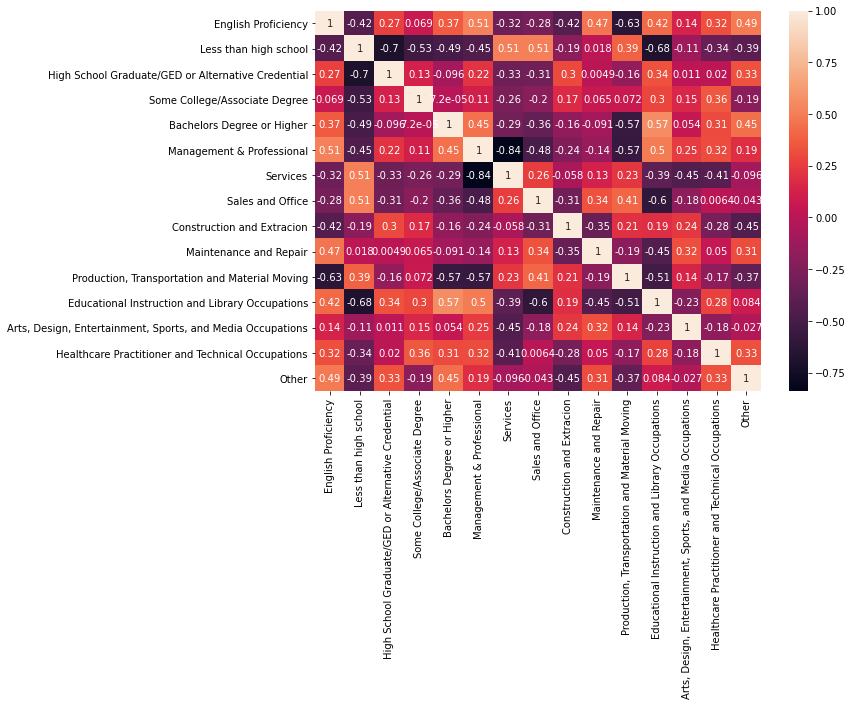

In [78]:
import seaborn as sns

plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)
plt
plt.savefig("../correlations.png")

### Correlations for selected features:

In [75]:
df["English Proficiency"].corr(df['Bachelors Degree or Higher'])

0.36599419237236847

In [72]:
df['English Proficiency'].corr(df['Management & Professional'])

0.5139666840880064

In [73]:
df['English Proficiency'].corr(df['Other'])

0.4870347261866101

In [80]:
df['English Proficiency'].corr(df['Educational Instruction and Library Occupations'])

0.4205860196350395

In [76]:
df['Bachelors Degree or Higher'].corr(df['Management & Professional'])

0.4510932191104703

In [77]:
df['Bachelors Degree or Higher'].corr(df['Other'])

0.4457701363912616

In [79]:
df['Bachelors Degree or Higher'].corr(df['Educational Instruction and Library Occupations'])

0.5687899112470189